<a href="https://colab.research.google.com/github/Ifeoluwayemisi/Collab-/blob/main/NSK_AI_Origins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokens & Tokenization

In [1]:
!pip install sentencepiece --q

In [2]:
# Import tokenizer
import nltk
from nltk.tokenize import word_tokenize

# Load tokens
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## Word Tokinization

In [3]:
# Sample text
text = "Welcome to NSK.AI Bootcamp on RAG!"

# Get word token
tokens = word_tokenize(text)

print("Tokens:", tokens)

Tokens: ['Welcome', 'to', 'NSK.AI', 'Bootcamp', 'on', 'RAG', '!']


## Subword tokenization

In [31]:
# Subword tokenization
from sentencepiece import SentencePieceTrainer, SentencePieceProcessor

# Sample text to write to a file
text_data = "Welcome to NSK.AI Bootcamp on RAG! This is a sample text for training the SentencePiece model."

# Create a dummy text file for training
with open('filename.txt', 'w') as f:
    f.write(text_data)

# Train a SentencePiece model
SentencePieceTrainer.train(
    input='filename.txt',
    model_prefix='nsk_subword',
    vocab_size=179,
    model_type='bpe'
)

# Load the trained model
sp = SentencePieceProcessor()
sp.load('nsk_subword.model')

# Sample text for encoding
text = "Welcome to NSK.AI Bootcamp on RAG!"

# Encode the text into subword tokens
subword_tokens = sp.encode_as_pieces(text)

print("Subword Tokens:", subword_tokens)

Subword Tokens: ['▁Welcome', '▁to', '▁NSK', '.', 'AI', '▁Bootcamp', '▁on', '▁RAG', '!']


## Character tokenization

In [5]:
# Character tokenizer

def character_tokenize(text):
  return list(text)

# Sample text for character tokenization
text = "Welcome to NSK.AI Bootcamp on RAG!"

# Get character tokens
character_tokens = character_tokenize(text)

print("Character Tokens:", character_tokens)


Character Tokens: ['W', 'e', 'l', 'c', 'o', 'm', 'e', ' ', 't', 'o', ' ', 'N', 'S', 'K', '.', 'A', 'I', ' ', 'B', 'o', 'o', 't', 'c', 'a', 'm', 'p', ' ', 'o', 'n', ' ', 'R', 'A', 'G', '!']


## Byte Tokenization

In [6]:
# Byte Tokens
text = "Ghana"
byte_tokens = list(text.encode("utf-8"))
print(byte_tokens)

[71, 104, 97, 110, 97]


## Tokeninzing numbers

In [7]:
# Traditional Tokenization
text = "Ghana's population in 2023 is 34.2 million"

tokens = word_tokenize(text)
print(tokens)

['Ghana', "'s", 'population', 'in', '2023', 'is', '34.2', 'million']


## Hybrid Tokenization

In [8]:
# Hybrid Tokenization
output = ['Ghana', "'", 's', 'population', 'in', '<YEAR>', 'is', '<NUM>', 'million']
output

['Ghana', "'", 's', 'population', 'in', '<YEAR>', 'is', '<NUM>', 'million']

# Neural Network

In [9]:
from tensorflow import keras
from tensorflow.keras import Sequential, layers
import matplotlib.pyplot as plt

In [10]:
# Load handwritten data
handwritten_digits = keras.datasets.mnist

# Split the data into training and test sets for evaluation
(train_images, train_labels), (test_images, test_labels) = handwritten_digits.load_data()

# These are the names of the classes for the various handwritten digits
class_names = [0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


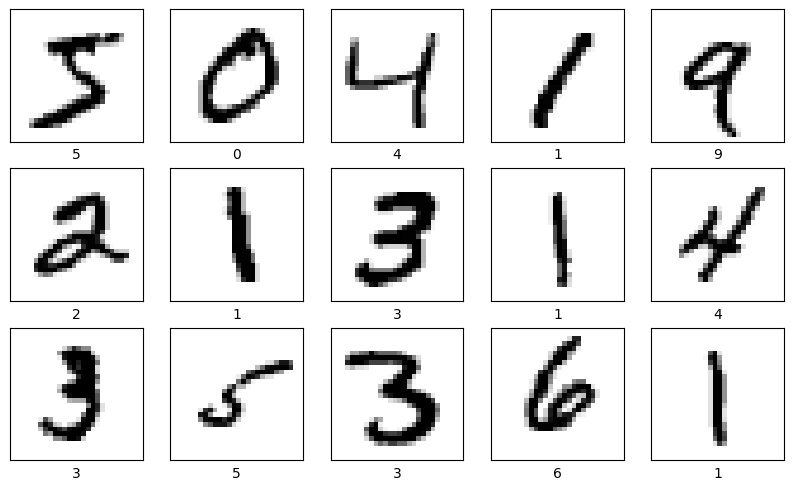

In [11]:
# View 15 of the images

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

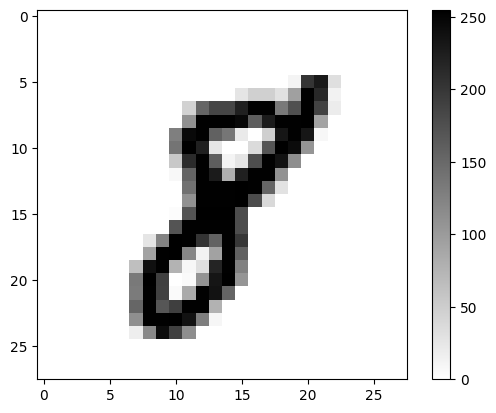

In [12]:
# Display a given image
plt.figure
plt.imshow(train_images[17], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
print(train_images[17])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  11 203 229  32   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  26  47  47
   30  95 254 215  13   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  45 154 185 185 223 253 253
  133 175 255 188  19   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 110 253 253 253 24

In [14]:
# Normalize image values
train_images = train_images/255.0
test_images = test_images/255.0

In [15]:
# Create a neural network model
model = Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
# Compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
# Train model
history = model.fit(train_images, train_labels, validation_split=0.1, epochs=5)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8675 - loss: 0.4634 - val_accuracy: 0.9680 - val_loss: 0.1140
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9625 - loss: 0.1245 - val_accuracy: 0.9718 - val_loss: 0.0977
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9753 - loss: 0.0831 - val_accuracy: 0.9745 - val_loss: 0.0892
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9820 - loss: 0.0584 - val_accuracy: 0.9782 - val_loss: 0.0806
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9865 - loss: 0.0458 - val_accuracy: 0.9783 - val_loss: 0.0740


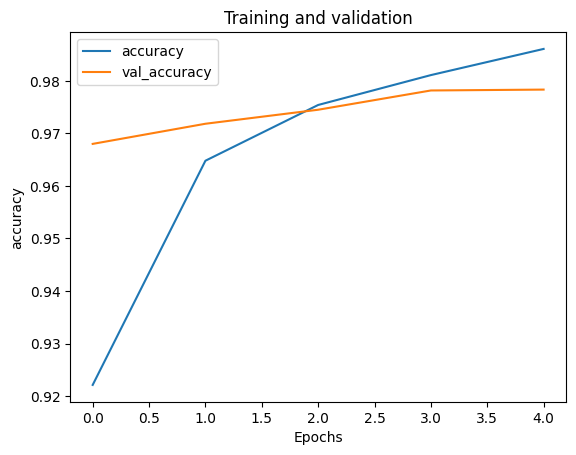

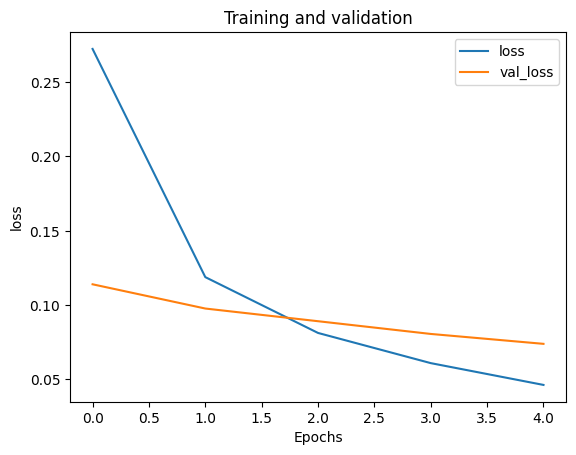

In [18]:
# Evaluate model
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.title('Training and validation')
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print("Test accuracy: ", test_acc)

Test accuracy:  0.9793999791145325


# Transformers

In [20]:
# Import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [21]:
# Sample training texts
texts = [
    "The sun sets over the horizon.",
    "A gentle breeze rustles the leaves.",
    "Stars twinkle in the night sky.",
    "Rain falls softly on the rooftop.",
    "Birds chirp at the break of dawn."
]

In [22]:
# Build vocabulary
chars = sorted(set("".join(texts)))
char2idx = {ch: idx for idx, ch in enumerate(chars)}
idx2char = {idx: ch for ch, idx in char2idx.items()}
vocab_size = len(chars)

In [23]:
# Encode text
def encode(text): return [char2idx[ch] for ch in text]
def decode(indices): return "".join([idx2char[i] for i in indices])

In [24]:
# Model definition
class SimpleTransformer(nn.Module):
    def __init__(self, vocab_size, embed_dim=64, num_heads=4, ff_dim=128):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.pos_embedding = nn.Parameter(torch.randn(1, 100, embed_dim))
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dim_feedforward=ff_dim, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=1)
        self.fc = nn.Linear(embed_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x) + self.pos_embedding[:, :x.size(1), :]
        x = self.transformer(x)
        return self.fc(x)

In [25]:
# Instantiate model
model = SimpleTransformer(vocab_size)
example = encode("The sun")
input_tensor = torch.tensor([example], dtype=torch.long)
output = model(input_tensor)

In [26]:
# Predict next characters
predicted = torch.argmax(output, dim=-1).squeeze().tolist()
print("Input:", decode(example))
print("Predicted:", decode(predicted))

Input: The sun
Predicted: A  zfhb


## Further improvement

In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

encoded_texts = [encode(text) for text in texts]
max_len = max(len(seq) for seq in encoded_texts)
padded_sequences = pad_sequences(encoded_texts, maxlen=max_len, padding='post', value=0)
input_tensor = torch.tensor(padded_sequences, dtype=torch.long)

In [28]:
# Parameters
learning_rate = 0.0001
epochs = 10000
batch_size = 32

In [29]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

for epoch in range(epochs):
    for i in range(0, input_tensor.size(0), batch_size):
        batch = input_tensor[i:i+batch_size]
        inputs = batch[:, :-1]
        targets = batch[:, 1:]

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.reshape(-1, vocab_size), targets.reshape(-1))

        loss.backward()
        optimizer.step()

    if (epoch+1) % 2000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [2000/10000], Loss: 0.0213
Epoch [4000/10000], Loss: 0.0043
Epoch [6000/10000], Loss: 0.0014
Epoch [8000/10000], Loss: 0.0005
Epoch [10000/10000], Loss: 0.0002


In [30]:
# Evaluate
sample_text = "Stars "
encoded_sample = encode(sample_text)
input_sample_tensor = torch.tensor([encoded_sample], dtype=torch.long)

model.eval()
with torch.no_grad():
    output_sample = model(input_sample_tensor)

predicted_indices = torch.argmax(output_sample, dim=-1).squeeze().tolist()
predicted_text = decode(predicted_indices)

print("Original Input:", sample_text)
print("Predicted Output:", predicted_text)

Original Input: Stars 
Predicted Output:  aes  
